In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from collections import OrderedDict

# In[deskew]:
def deskew(img):
    thresh=img
    edges = cv2.Canny(thresh,50,200,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/1000, 55)
    try:
        d1 = OrderedDict()
        for i in range(len(lines)):
            for rho,theta in lines[i]:
                deg = np.rad2deg(theta)
#                print(deg)
                if deg in d1:
                    d1[deg] += 1
                else:
                    d1[deg] = 1

        t1 = OrderedDict(sorted(d1.items(), key=lambda x:x[1] , reverse=False))
        print(list(t1.keys())[0],'Angle' ,thresh.shape)
        non_zero_pixels = cv2.findNonZero(thresh)
        center, wh, theta = cv2.minAreaRect(non_zero_pixels)
        angle=list(t1.keys())[0]
        if angle>160:
            angle=180-angle
        if angle<160 and angle>20:
            angle=12
        root_mat = cv2.getRotationMatrix2D(center, angle, 1)
        rows, cols = img.shape
        rotated = cv2.warpAffine(img, root_mat, (cols, rows), flags=cv2.INTER_CUBIC)

    except:
        rotated=img
        pass
    return rotated

def unshear(img):

    gray = img
    thresh = img.copy()
    #print(thresh)
    plt.imshow(thresh)
    plt.show()
    trans = thresh.transpose()

    arr=[]
    for i in range(thresh.shape[1]):
        arr.insert(0,trans[i].sum())

    arr=[]
    for i in range(thresh.shape[0]):
        arr.insert(0,thresh[i].sum())

    y = thresh.shape[0]-1-np.nonzero(arr)[0][0]
    y_top = thresh.shape[0]-1-np.nonzero(arr)[0][-1]

    trans1 = thresh.transpose()
    sum1=[]
    for i in range(trans1.shape[0]):
        sum1.insert(i,trans1[i].sum())

    height = y - y_top
    max_value = 255*height
    prev_num = len([i for i in sum1 if i>=(0.6*max_value)])
    final_ang = 0

    # # print(arr)
    # # print(x,y)
    for ang in range(-25,25,3):
        thresh = gray.copy()
        #print(thresh[0].shape)
        #print(ang)
        print('Ang',ang)
        if ang>0:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(ang))))
                if move >= temp.size:
                    move = temp.size
                thresh[i][:temp.size-move]=temp[move:]
                thresh[i][temp.size-move:] = [0 for m in range(move)]
        else:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(-ang))))
                if move >= temp.size:
                    move = temp.size
                #print(temp[:-3])
                #print(temp[:temp.size-move].shape, thresh[i][move%temp.size:].shape)
                thresh[i][move:]=temp[:temp.size-move]
                thresh[i][:move]=[0 for m in range(move)]

#         plt.imshow(thresh)
#         plt.show()
        trans1 = thresh.transpose()
        sum1=[]
        for i in range(trans1.shape[0]):
            sum1.insert(i,trans1[i].sum())
        #print(sum1)
        num = len([i for i in sum1 if i>=(0.60*max_value)])
        #print(num, prev_num)
        if(num>=prev_num):
            prev_num=num
            final_ang = ang
        #plt.imshow(thresh)
        #plt.show()
    #print("final_ang:", final_ang)

    thresh= gray.copy()
    if final_ang>0:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(final_ang))))
            if move >= temp.size:
                move = temp.size
            thresh[i][:temp.size-move]=temp[move:]
            thresh[i][temp.size-move:] = [0 for m in range(move)]
    else:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(-final_ang))))
            #print(move)
            if move >= temp.size:
                move = temp.size
            thresh[i][move:]=temp[:temp.size-move]
            thresh[i][:move]=[0 for m in range(move)]

    plt.imshow(thresh, cmap='gray_r')
    return thresh



In [ ]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image as image_tf
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage import color, data, filters, graph, measure, morphology,io
from skimage.filters import threshold_otsu,threshold_li
import cv2

Implementation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_image.png to processed_image (1).png


In [ ]:
img = cv2.imread('example_crop_1746.png')

In [ ]:
img.shape

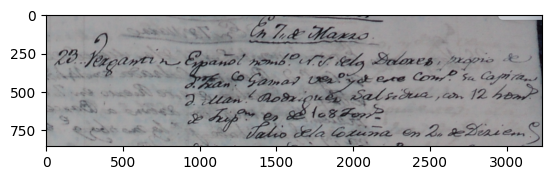

In [ ]:
plt.imshow(img)

In [ ]:
def image_processer_2(img):
  retina = img[:,:,:3]
  retina = color.rgb2gray(retina)
  t0,t1,t2,t3,t4 = filters.threshold_multiotsu(retina, classes=6)

  mask = (retina < t0)
  vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
  thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
  labeled = ndi.label(thresholded)[0]


  thresh = threshold_otsu(retina)
  binary = thresh > retina
  binary = unshear(binary * 255)
  plt.axis('off')
  plt.imshow(binary)
  plt.savefig('processed_image',dpi=300,bbox_inches='tight',pad_inches=0)
  return binary

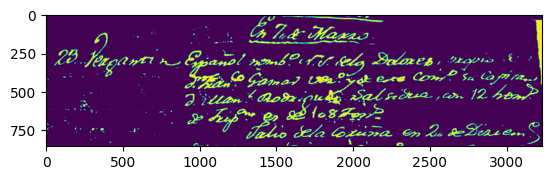

Ang -25
Ang -22
Ang -19
Ang -16
Ang -13
Ang -10
Ang -7
Ang -4
Ang -1
Ang 2
Ang 5
Ang 8
Ang 11
Ang 14
Ang 17
Ang 20
Ang 23


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

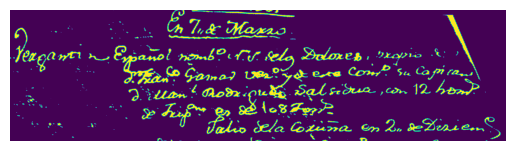

In [ ]:
image_processer_2(img)

In [ ]:
img2 = cv2.imread('processed_image.png')

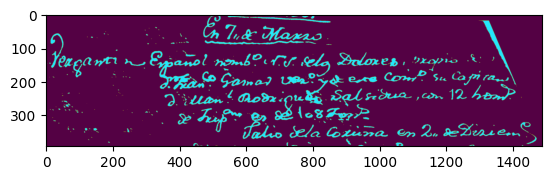

In [ ]:
plt.imshow(img2)

### Connected Components

In [ ]:
import skimage

In [ ]:
def connected_components(img, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = img
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # mask the image according to threshold
    binary_mask = gray_image > t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count, binary_mask

In [ ]:
labeled_image, count, binary_mask= connected_components(img2)

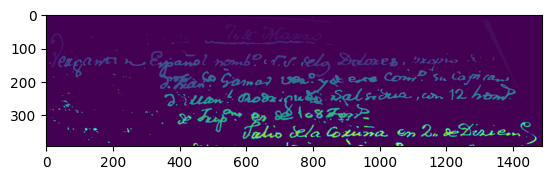

In [ ]:
plt.imshow(labeled_image)

In [ ]:
object_features = skimage.measure.regionprops(labeled_image)
object_areas = [objf["area"] for objf in object_features]
object_areas

[4,
 1058,
 3,
 21,
 92,
 113,
 80,
 203,
 988,
 2043,
 426,
 2211,
 14,
 1,
 523,
 4,
 2,
 2,
 927,
 7,
 21,
 19,
 69,
 2,
 1,
 40,
 2,
 18,
 11,
 1,
 13,
 5,
 1,
 1425,
 22,
 78,
 5,
 7,
 34,
 7,
 3,
 13,
 3,
 15,
 13,
 23,
 650,
 1,
 1609,
 828,
 9,
 1116,
 143,
 175,
 299,
 129,
 1,
 363,
 318,
 2,
 1,
 439,
 50,
 659,
 8,
 27,
 312,
 264,
 61,
 2,
 22,
 387,
 367,
 342,
 221,
 86,
 328,
 63,
 1,
 755,
 71,
 547,
 108,
 9,
 3359,
 7,
 6,
 38,
 5,
 61,
 9,
 2,
 10,
 11,
 1,
 6,
 2,
 9,
 3,
 16,
 11,
 61,
 6,
 62,
 1,
 21,
 286,
 17,
 1,
 626,
 7,
 36,
 2,
 801,
 971,
 229,
 275,
 19,
 141,
 6,
 379,
 88,
 521,
 327,
 1055,
 5,
 5,
 822,
 6,
 1,
 426,
 1,
 1,
 6,
 15,
 51,
 58,
 5,
 4,
 50,
 1423,
 14,
 17,
 163,
 23,
 1095,
 22,
 331,
 3,
 1,
 41,
 722,
 788,
 140,
 314,
 12,
 6,
 8,
 165,
 405,
 18,
 8,
 2,
 13,
 888,
 663,
 279,
 403,
 1,
 2,
 7,
 12,
 395,
 10,
 19,
 252,
 1,
 5,
 1071,
 1303,
 8,
 6,
 35,
 31,
 2,
 2,
 1,
 58,
 8,
 6,
 4,
 3,
 17,
 5,
 36,
 46,
 11,
 1,
 78,
 10

In [ ]:
min_area = 15

large_objects = []
for objf in object_features:
    if objf["area"] > min_area:
        large_objects.append(objf["label"])
print("Found", len(large_objects), "objects!")

Found 160 objects!


In [ ]:
n = 0
for i in object_areas:
  if i > min_area:
    n +=1
print("Found", n, "objects!")

Found 160 objects!


In [ ]:
for object_id, objf in enumerate(object_features, start=1):
    if objf["area"] < min_area :
        labeled_image[labeled_image == objf["label"]] = 0

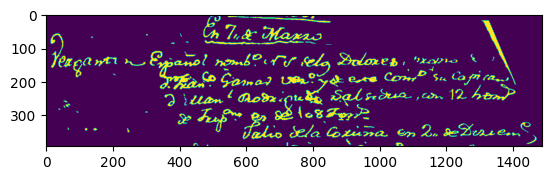

In [ ]:
object_mask = skimage.morphology.remove_small_objects(binary_mask,min_area)
plt.imshow(object_mask)

In [ ]:
labeled_image, n = skimage.measure.label(object_mask,
                                         connectivity=2, return_num=True)

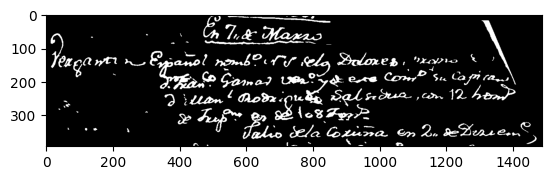

In [ ]:
thresh = threshold_otsu(labeled_image)
labeled_image = thresh*.002 > labeled_image
plt.imshow(labeled_image,cmap = 'gray_r')
plt.savefig('cc_processed')


In [ ]:
img3 = cv2.imread('cc_processed.png')

In [ ]:

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
dilation = cv2.dilate(img3, horizontal_kernel, iterations=1)
dilation = cv2.cvtColor(dilation,cv2.COLOR_BGR2GRAY)
horizontal_contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
for cnt in horizontal_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(img2, (x, y), (x + w, y + h), (255, 255, 255), 1)

In [ ]:
#identify network design
#bnn activation functions determine conditional probability values p(theta | data)
#you want to maximize likelihood and create a prior
#reshape individual images to a specific size
